##**simulasi MC**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
avg = 1
std_dev = .1
byk_reps = 500
byk_simulasi = 100000

In [ ]:
np.random.seed(100)
pst_target = np.random.normal(avg,std_dev,byk_reps).round(2)
pst_target[0:5]

array([0.83, 1.03, 1.12, 0.97, 1.1 ])

In [ ]:
penjualan_target_nilai = [75000, 100000,200000,300000,400000,500000]
penjualan_target_prob = [.3, .3, .2 , .1, .05, .05]
penjualan_target = np.random.choice(penjualan_target_nilai,byk_reps, p=penjualan_target_prob)
penjualan_target[0:5]

array([200000, 100000, 100000, 300000, 100000])

In [ ]:
df = pd.DataFrame(index=range(byk_reps), data ={'Penjualan_Target': penjualan_target,'Pst_Target': pst_target})
df['Penjualan']=df['Pst_Target']*df['Penjualan_Target']
df[0:5]

,Penjualan_Target,Pst_Target,Penjualan
0,200000,0.83,166000.0
1,100000,1.03,103000.0
2,100000,1.12,112000.0
3,300000,0.97,291000.0
4,100000,1.10,110000.0


In [ ]:
def hit_tingkat_komisi(x):
  """Acuan  tingkat komisi:
  0-90% = 2 %
  91-99% = 3%
  >=100% = 4%
  """
  if x<= .90:
    return .02
  if x<=.99:
    return .03
  else :
    return .04

In [ ]:
df['Tingkat_Komisi']=df['Pst_Target'].apply(hit_tingkat_komisi)
df['Besaran_Komisi']=df['Tingkat_Komisi']*df['Penjualan']

In [ ]:
df[0:5]

,Penjualan_Target,Pst_Target,Penjualan,Tingkat_Komisi,Besaran_Komisi
0,200000,0.83,166000.0,0.02,3320.0
1,100000,1.03,103000.0,0.04,4120.0
2,100000,1.12,112000.0,0.04,4480.0
3,300000,0.97,291000.0,0.03,8730.0
4,100000,1.10,110000.0,0.04,4400.0


In [ ]:
df.describe()

,Penjualan_Target,Pst_Target,Penjualan,Tingkat_Komisi,Besaran_Komisi
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,168400.000000,0.999380,168592.000000,0.033160,5713.490000
std,122234.703114,0.103222,124690.786028,0.007729,4737.675792
min,75000.000000,0.700000,52500.000000,0.020000,1050.000000
25%,75000.000000,0.937500,82312.500000,0.030000,2872.500000
50%,100000.000000,1.000000,103000.000000,0.040000,4040.000000
75%,200000.000000,1.070000,214500.000000,0.040000,8160.000000
max,500000.000000,1.350000,615000.000000,0.040000,24600.000000


In [ ]:
df['Besaran_Komisi'].sum().round(0)

2856745.0

In [ ]:
# mennetukan daftar untuk menyimpan semua hasil dari setiap simulasi yang ingin kita analisis
all_stats=[]

# pengulangan melalui banyak simulasi
for i in range(byk_simulasi):

   #memilih input acak untuk target penjualan dan persentase target
   pst_target = np.random.normal(avg,std_dev,byk_reps).round(2)
   penjualan_target = np.random.choice(penjualan_target_nilai,byk_reps,p=penjualan_target_prob)

   #membangun dataframe berdasarkan input dan banyak replikasi
   df = pd.DataFrame(index=range(byk_reps),data={'Pst_Target':pst_target,
                                                 'Penjualan_Target':penjualan_target})

   #menghitung banyaknya penjualan menggunakan persentase target
   df['Penjualan']=df['Pst_Target']*df['Penjualan_Target']

   #menentukan tingkat komisi dan menghitung besaran komisi
   df['Tingkat_Komisi']=df['Pst_Target'].apply(hit_tingkat_komisi)
   df['Besaran_Komisi']=df['Tingkat_Komisi']*df['Penjualan']

   #menyimpan penjualan, besaran komisi, dan target penjualan di semua simulasi
   all_stats.append([df['Penjualan'].sum().round(2),
                     df['Besaran_Komisi'].sum().round(2),
                     df['Penjualan_Target'].sum().round(2)])


In [ ]:
hasil_df = pd.DataFrame.from_records(all_stats,columns=['Penjualan','Besaran_Komisi','Penjualan_Target'])

In [ ]:
hasil_df.describe()

,Penjualan,Besaran_Komisi,Penjualan_Target
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,8.374605e+07,2.859190e+06,8.374680e+07
std,2.708576e+06,1.023757e+05,2.670810e+06
min,7.200575e+07,2.427425e+06,7.177500e+07
25%,8.190650e+07,2.789541e+06,8.192500e+07
50%,8.371225e+07,2.857744e+06,8.370000e+07
75%,8.554650e+07,2.927582e+06,8.552500e+07
max,9.615025e+07,3.322150e+06,9.635000e+07


In [ ]:
hasil_df

,Penjualan,Besaran_Komisi,Penjualan_Target
0,81417750.0,2785550.0,81150000
1,87699750.0,3018595.0,87450000
2,85145750.0,2965705.0,84125000
3,83199000.0,2846360.0,83025000
4,82093500.0,2811050.0,81925000
...,...,...,...
99995,80559500.0,2712767.5,81075000
99996,85508500.0,2917537.5,85700000
99997,83626000.0,2822377.5,84000000
99998,87654500.0,2998015.0,87575000


In [ ]:
komisi=hasil_df['Besaran_Komisi']

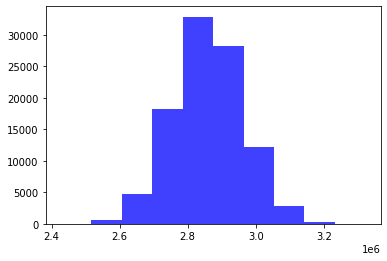

In [ ]:
plt.hist(komisi,10,histtype='bar',facecolor='b',alpha=0.75)
plt.show()
